In this task, you will train a binary classifier that classifies points in the 2-d plane into two categories. The points are drawn from Gaussian Distributions. You can use the exactly the same as in the notebook MNIST_MLP_Example.ipynb . Please copy and paste the relevant cells, make the required adaptations (very minimal) and train your first classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edf

In [2]:
num_points=2000
points_upper_right=np.random.multivariate_normal([1., 1.],[ [1.,0], [0., 1.] ], size=num_points//2  )
points_lower_left=np.random.multivariate_normal([-1., -1.],[ [1.,0], [0., 1.] ], size=num_points//2  )
labels_upper_right=np.zeros(points_upper_right[:,0].shape, dtype=np.int32)
labels_lower_left=np.ones(points_lower_left[:,0].shape, dtype=np.int32)

In [3]:
# We create the dataset by concatenating both points and them permuting them randomly
data=np.concatenate([points_upper_right, points_lower_left])
labels=np.concatenate([labels_upper_right, labels_lower_left])

permutation=np.random.permutation(num_points)
data=data[permutation]
labels=labels[permutation]

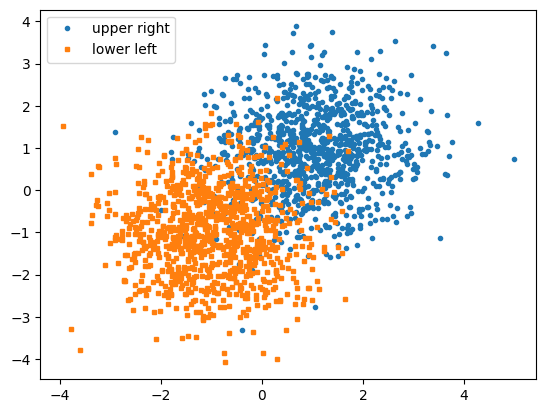

In [4]:
# Let's make a plot with the two classes plottet in different colors with different symbols
plt.plot(points_upper_right[:,0], points_upper_right[:,1], '.', label="upper right")
plt.plot(points_lower_left[:,0], points_lower_left[:,1], 's', markersize=3, label="lower left")
plt.legend()
plt.savefig("./data.png")

In [5]:
# Now split the data into Train and Test with a fraction of 20%
test_fraction=0.2
number_train_samples=int( (1-test_fraction)*num_points )
# In order to make your life as simple as possible, we can just use the sample variable names
# for train and test imags and labels as in the MNist Example
train_images=data[:number_train_samples]
train_labels=labels[:number_train_samples]
test_images=data[number_train_samples:]
test_labels=labels[number_train_samples:]

In [12]:
# input code here
def run_epoch(batch_size, data, labels, xnode, ynode, probnode, lossnode=None):
    num_samples = len(data)
    total_err = 0.0
    num_batches = num_samples//batch_size
    for i in range(num_batches):
        start, end = i*batch_size, (i+1)*batch_size
        xnode.value = train_images[start:end]
        ynode.value = train_labels[start:end]
        edf.Forward()
        total_err += np.sum(np.not_equal(np.argmax(probnode.value, axis=1), ynode.value))
        if lossnode:
            edf.Backward(lossnode)
            edf.SGD()
        if i>0 and i%400 == 0:
            print ("\t Batch {}/{}".format(i, num_batches))
    return 100*total_err/num_samples

def train(num_epochs, batch_size, xnode, ynode, probnode, lossnode):
    train_err_log = []
    test_err_log = []
    for epoch in range(num_epochs):
        print("Epoch: {}/{}".format(epoch+1, num_epochs))
        train_err = run_epoch(batch_size, train_images, train_labels, xnode, ynode, probnode, lossnode)
        train_err_log.append(train_err)
        print ("\t Training Error {:.2f} %".format(train_err))
        test_err = run_epoch(len(test_images), test_images, test_labels, xnode, ynode, probnode)
        test_err_log.append(test_err)
        print ("\t Test Error {:.2f} %".format(test_err))
    return train_err_log, test_err_log

In [13]:
# input code here
"""we manually set the number of input features (784)
and number of classes (10) which will be used to
define the model"""

nInputs = 784
nLabels = 10

"""below, MLPparams is an EDF ParameterPackage whose
purpose is to define and store the parameters of the model,
while MLPgraph is a function that implements the model's
forward pass -- in this case, just a 1-hidden layer MLP"""

class MLPparams(edf.ParameterPackage):
    def __init__(self,nInputs, nHiddens, nLabels):
        self.first = edf.AffineParams(nInputs,nHiddens)
        self.last = edf.AffineParams(nHiddens,nLabels)
        
def MLPsigmoidgraph(Phi, x):
    h = edf.Sigmoid(edf.Affine(Phi.first, x))
    return edf.Softmax(edf.Affine(Phi.last, h))

"""we then construct a MLP with 64 hidden units"""

np.random.seed(1234)
edf.clear_compgraph()
xnode = edf.Input()
ynode = edf.Input()
nHiddens = 64
Phi = MLPparams(nInputs, nHiddens, nLabels)
probnode = MLPsigmoidgraph(Phi, xnode)
lossnode = edf.LogLoss(probnode, ynode)

In [14]:
# input code here

num_epochs = 10
batch_size = 64
edf.learning_rate = 0.5
train_err_log, test_err_log = train(num_epochs, batch_size, xnode, ynode, probnode, lossnode)

Epoch: 1/10


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 2)

In [10]:
# Let's draw 
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
xnode.value = np.array([xx, yy]).transpose([1,2,0]).reshape([-1,2])
edf.Forward()
zz=probnode.value[:,0]
zz=zz.reshape([101,101])

NameError: name 'xnode' is not defined

In [11]:
h = plt.contourf(xx, yy, zz)
plt.axis('scaled')
plt.colorbar()
plt.plot(points_upper_right[:,0], points_upper_right[:,1], '.', label="upper right")
plt.plot(points_lower_left[:,0], points_lower_left[:,1], 's', markersize=3, label="lower left")
plt.legend()
plt.show()
plt.savefig("./data_and_classifier.png")

NameError: name 'zz' is not defined